In [ ]:
##

## Introduction

In this  project, we will use ames house pricing data('https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset') ('kaggle datasets download -d shashanknecrothapa/ames-housing-dataset') with XGBoost regression algorithm. We dive  into regression fundamentals, exploring objective functions and base learners. By leveraging decision trees and linear base learners, and implementing regularization techniques, we aim to enhance model accuracy. Additionally, we visualize individual XGBoost trees and identify key features driving housing prices.

# Ames Housing Dataset Overview

The Ames Housing Dataset is a renowned dataset in the field of machine learning and data analysis, providing detailed information about residential properties in Ames, Iowa, USA. It is commonly used for regression tasks, particularly in predicting housing prices.

### Key Details:

- **Number of Instances:** 2,930 instances or observations.
- **Number of Features:** 79 different features or variables describing various aspects of residential properties.
- **Target Variable:** The "SalePrice" variable represents the sale price of the houses.
- **Data Types:** The dataset includes both numerical and categorical variables, covering attributes such as lot size, room count, location, and construction details.

### Usage:

The Ames Housing Dataset is widely utilized in the machine learning community for regression modeling, feature engineering, and predictive analytics related to housing prices. It serves as a valuable resource for testing and refining machine learning algorithms in the real estate domain.



In [31]:
import pandas as pd
import numpy as np

In [20]:
ames_raw=pd.read_csv('/content/ames_unprocessed_data.csv')
df=ames_raw
display(df.head()),df.info(),df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,...,1786,1,0,2,1,3,1,608,Y,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,...,1717,1,0,1,0,3,1,642,Y,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,...,2198,1,0,2,1,4,1,836,Y,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Neighborhood  1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   HouseStyle    1460 non-null   object 
 7   OverallQual   1460 non-null   int64  
 8   OverallCond   1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  Remodeled     1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  BsmtHalfBath  1460 non-null   int64  
 14  FullBath      1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64  
 18  GarageArea    1460 non-null 

(None,
 None,
         MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
 count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
 mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
 std      42.300571    24.284752    9981.264932     1.382997     1.112799   
 min      20.000000    21.000000    1300.000000     1.000000     1.000000   
 25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
 50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
 75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
 max     190.000000   313.000000  215245.000000    10.000000     9.000000   
 
          YearBuilt    Remodeled    GrLivArea  BsmtFullBath  BsmtHalfBath  \
 count  1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
 mean   1971.267808     0.476712  1515.463699      0.425342      0.057534   
 std      30.202904     0.499629   525.480383      0.518911 

In [21]:
df.iloc[:,:-1].shape

(1460, 20)

In [22]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]
X.shape, y.shape

((1460, 20), (1460,))

In [23]:
df.LotFrontage.isna().sum()

259

## preprocessing

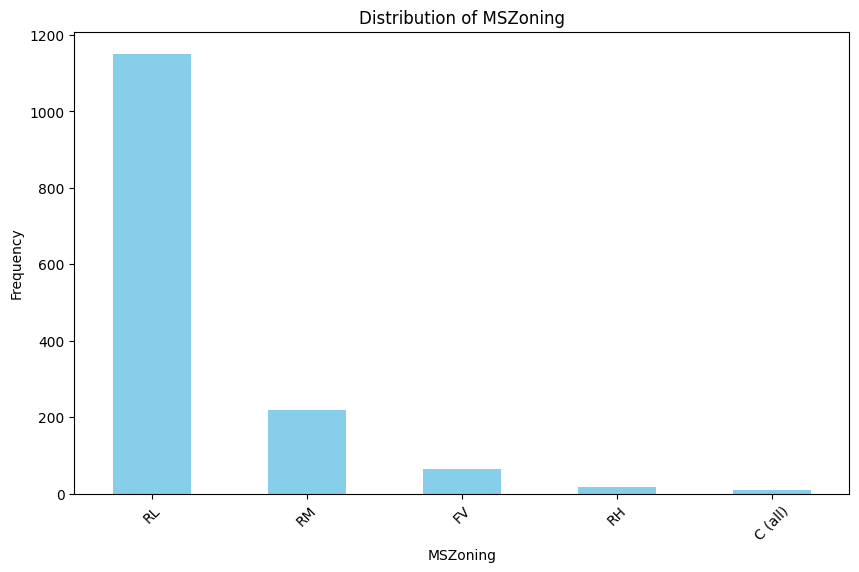

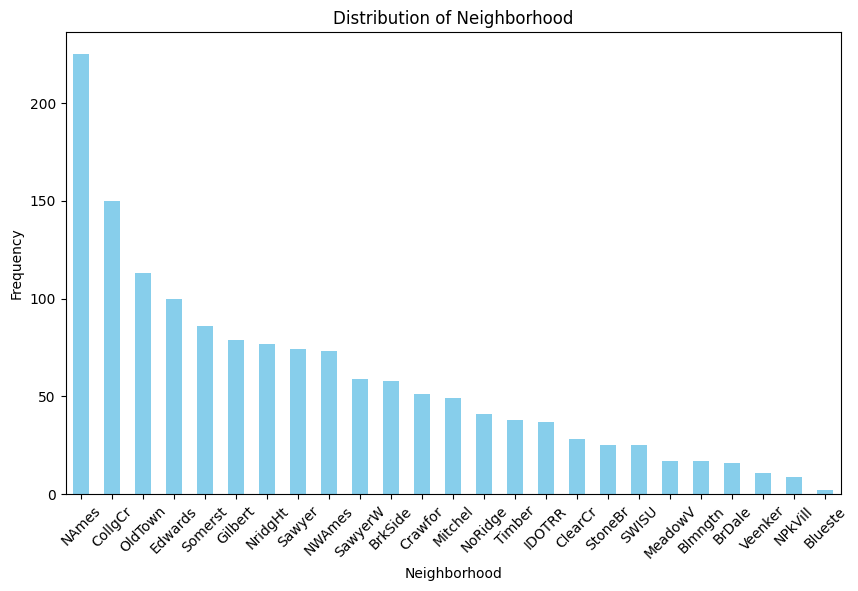

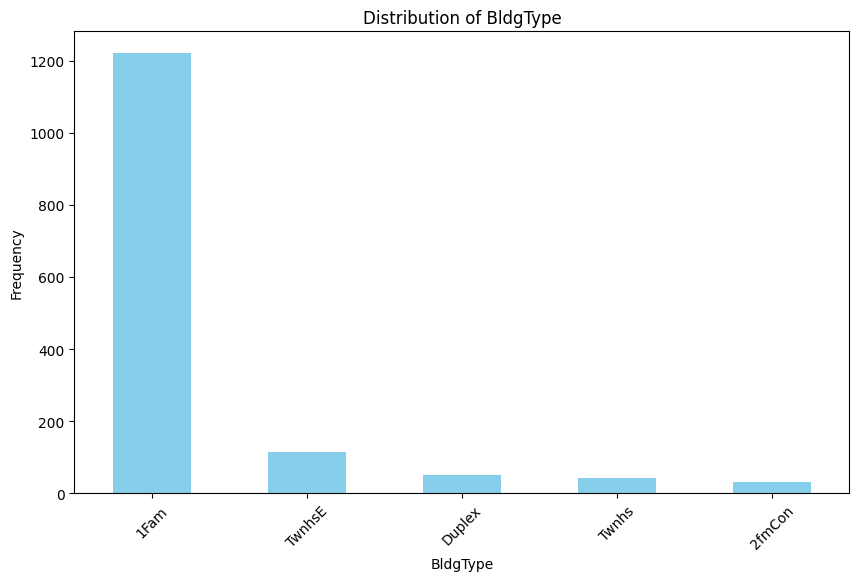

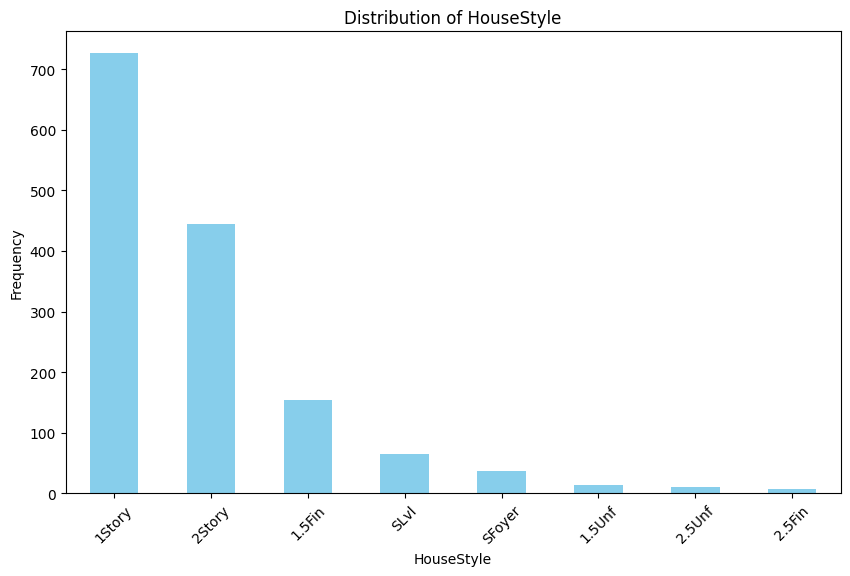

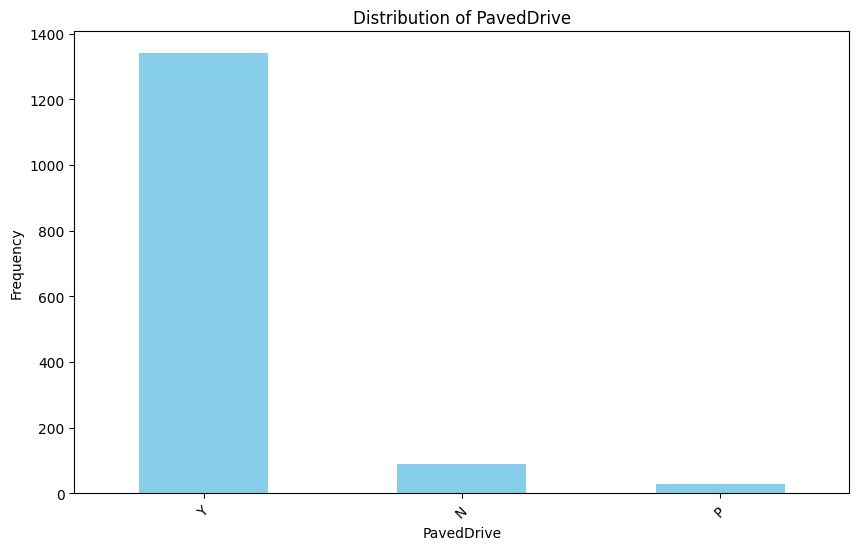

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == 'object')

# Get the categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Define a function to plot graphs for categorical variables
def plot_categorical_variables(df, columns):
    for column in columns:
        # Count occurrences of each category
        category_counts = df[column].value_counts()

        # Plot the bar graph
        plt.figure(figsize=(10, 6))
        category_counts.plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Customize x-axis labels to display category names
        plt.xticks(range(len(category_counts)), category_counts.index, rotation=45)

        plt.show()

# Call the function to plot graphs for categorical variables
plot_categorical_variables(df, categorical_columns)

### Encoding categorical columns I: LabelEncoder
first we need to deal with missing values

In [25]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
#df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
#categorical_mask = (df.dtypes == 'object')

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
display(df[categorical_columns].head())


  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y


,MSZoning,Neighborhood,BldgType,HouseStyle,PavedDrive
0,3,5,0,5,2
1,3,24,0,2,2
2,3,5,0,5,2
3,3,6,0,5,2
4,3,15,0,5,2


### Encoding categorical columns II: OneHotEncoder

There is  no natural ordering  on labelencoder. So, we have to apply a one-hot encoding to create binary, or "dummy" variables.

1.   List item
2.   List item



In [26]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1460, 21)
(1460, 3369)


Using `sparse=False` with `OneHotEncoder` results in a dense array output, where all elements, including zeros, are stored in a standard 2D array format. This makes the data easier to work with in some cases but may consume more memory. Sparse matrices, which are the default output format, are memory-efficient as they only store non-zero elements and their indices.


### Encoding categorical columns III: DictVectorizer

The two step process we just went through - LabelEncoder followed by OneHotEncoder - can be simplified by using a DictVectorizer.

Using a DictVectorizer on a DataFrame that has been converted to a dictionary allows us to get label encoding as well as one-hot encoding in one go.

In [27]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary with "records" argument: df_dict
df_dict = df.to_dict("records")

# Instantiate DictVectorizer object with sparse=False: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df_dict: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5])

# Print the vocabulary
print(dv.vocabulary_)


[[3.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 2.000e+00 5.480e+02
  1.710e+03 1.000e+00 5.000e+00 8.450e+03 6.500e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 2.000e+00 4.600e+02
  1.262e+03 0.000e+00 2.000e+00 9.600e+03 8.000e+01 2.000e+01 3.000e+00
  2.400e+01 8.000e+00 6.000e+00 2.000e+00 0.000e+00 1.815e+05 1.976e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 6.080e+02
  1.786e+03 1.000e+00 5.000e+00 1.125e+04 6.800e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 2.235e+05 2.001e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 1.000e+00 6.420e+02
  1.717e+03 0.000e+00 5.000e+00 9.550e+03 6.000e+01 7.000e+01 3.000e+00
  6.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 1.400e+05 1.915e+03]
 [4.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 8.360e+02
  2.198e+03 1.000e+00 5.000e+00 1.426e+04 8.400e+01 6.000e+0

In [ ]:
### Preprocessing within a pipeline

### Preprocessing within a pipeline

In [29]:
import xgboost as xgb

# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict('records'),y)

Pipeline(steps=[('ohe_onestep', DictVectorizer(sparse=False)),
                ('xgb_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
#

### Cross-validating the XGBoost model

In [32]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:linear"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline,X.to_dict('records'),y,
                  scoring='neg_mean_squared_error',cv=10)

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:00:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:00:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:00:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:00:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

10-fold RMSE:  29196.86933604953


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:00:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [33]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
#ames_data = pd.read_csv("/content/ames_housing_trimmed_processed.csv")
display(df.head()), df.info()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,3,65.0,8450,5,0,5,7,5,2003,...,1710,1,0,2,1,3,0,548,2,208500
1,20,3,80.0,9600,24,0,2,6,8,1976,...,1262,0,1,2,0,3,1,460,2,181500
2,60,3,68.0,11250,5,0,5,7,5,2001,...,1786,1,0,2,1,3,1,608,2,223500
3,70,3,60.0,9550,6,0,5,7,5,1915,...,1717,1,0,1,0,3,1,642,2,140000
4,60,3,84.0,14260,15,0,5,8,5,2000,...,2198,1,0,2,1,4,1,836,2,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   int64  
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Neighborhood  1460 non-null   int64  
 5   BldgType      1460 non-null   int64  
 6   HouseStyle    1460 non-null   int64  
 7   OverallQual   1460 non-null   int64  
 8   OverallCond   1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  Remodeled     1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  BsmtHalfBath  1460 non-null   int64  
 14  FullBath      1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64  
 18  GarageArea    1460 non-null 

(None, None)

## Decision Tree as Base Learner
 By default, XGBoost uses trees as base learners, but here, we are specifying  that we want to use trees here with booster="gbtree"

In [36]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]
X.shape, y.shape

((1460, 20), (1460,))

In [37]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11201)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:linear',n_estimators=10,booster='gbtree',seed=11201)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 31799.995607


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:01:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


## Linear base learners
Now that we've used trees as base models in XGBoost, let's use the other kind of base model that can be used with XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows us to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, we have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as xgb.train()

In [39]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)
# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)
# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 60590.204885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:09:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Interesting - it looks like linear base learners performed better!

### Evaluating model quality
It's now time to begin evaluating model quality.

Here, we will compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data.

In [40]:
                                           ### mae-mean ###
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y) #converting our X matrix and y vector into a single optimized DMatrix object

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=11201)

# Print cv_results
print(cv_results)

# Extract and print final round boosting round metric
print((cv_results["test-mae-mean"]).tail(1))



   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0    43959.716581     139.316857   44885.149711    552.997205
1    34865.169260     241.108940   36413.325460    947.674884
2    28618.897250     142.043925   30781.783107   1031.799421
3    24227.111540     144.855410   27125.882197   1213.753294
4    21032.688743      99.057810   24668.840095   1388.376608
4    24668.840095
Name: test-mae-mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:10:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [42]:
                                            ### rmse-mean ###
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=11201)

# Print cv_results
print(cv_results)

# Extract and print final round boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     61861.579576      763.018163    64234.375144    3645.961305
1     49819.669271      596.523153    53747.330851    4616.290048
2     41516.750377      392.527036    47047.864007    5161.776691
3     35456.523452      213.147174    42387.136650    6022.648051
4     30918.724250      202.546715    39147.960091    6332.565893
4    39147.960091
Name: test-rmse-mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:11:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


So, Here the Linear base learner model is giving more optimized result

## Regulization
 loss functions in XGBoost are used to find models that are both accurate and as simple as they can possibly be.
 1. **gamma:** Gamma is a parameter for tree base learners that controls whether a given node on a base learner will split based on the expected reduction in the loss that would occur after performing the split, so that higher values lead to fewer splits. Gamma regulates the complexity of the tree model by controlling the threshold for splitting nodes.
 2. **alpha:** Alpha is another name for L1 regularization. However, this regularization term is a penalty on leaf weights rather than on feature weights, as is the case in linear or logistic regression. Higher alpha values lead to stronger L1 regularization, which causes many leaf weights in the base learners to go to 0. MMainly use for feature selecton.
 3. **Lambda:** Lambda is another name for l2 regularization. L2 regularization is a much smoother penalty that l1 and causes leaf weights to smoothly decrease, instead of enforcing strong sparsity constraints on the leaf weights as in l1. This L2 regularization is particularly effective in controlling the overall complexity of the model and reducing variance.

In [43]:
## l1 regulization
boston_dmatrix = xgb.DMatrix(data=X,label=y) #converting our X matrix and y vector into a single optimized DMatrix object
params={"objective":"reg:linear","max_depth":4} #loss function necessary for regression and max depth each tree base learner can have
l1_params = [.1,1,10,100,1000]
rmses_l1=[]
for reg in l1_params:
  params["alpha"] = reg #CREATING NEW KEY-VALUE PAIR IN OUR PARAMETER DICT THAT HOLD CURRENT ALPHA VALUE
  cv_results = xgb.cv(dtrain=boston_dmatrix, params=params,nfold=4,
                num_boost_round=5,metrics="rmse",as_pandas=True,seed=1120)# NUM_BOOST_ROUND=NUM OF TREES
  rmses_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])
print("Best rmse as a function of l1:")
print(pd.DataFrame(list(zip(l1_params,rmses_l1)), columns=["l1","rmse"]))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:14:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Best rmse as a function of l1:
       l1          rmse
0     0.1  38121.170205
1     1.0  38121.171799
2    10.0  38121.183704
3   100.0  38121.314766
4  1000.0  38112.592351


In [44]:


reg_params = [.1,1,10,100,1000]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg

    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=boston_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=1120)

    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2","rmse"]))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:15:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Best rmse as a function of l2:
       l2          rmse
0     0.1  39400.113055
1     1.0  39391.766885
2    10.0  41492.611385
3   100.0  49558.946624
4  1000.0  65597.035432


 It looks like as as the value of 'alpha' and 'lambda' increases, so does the RMSE.

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:16:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


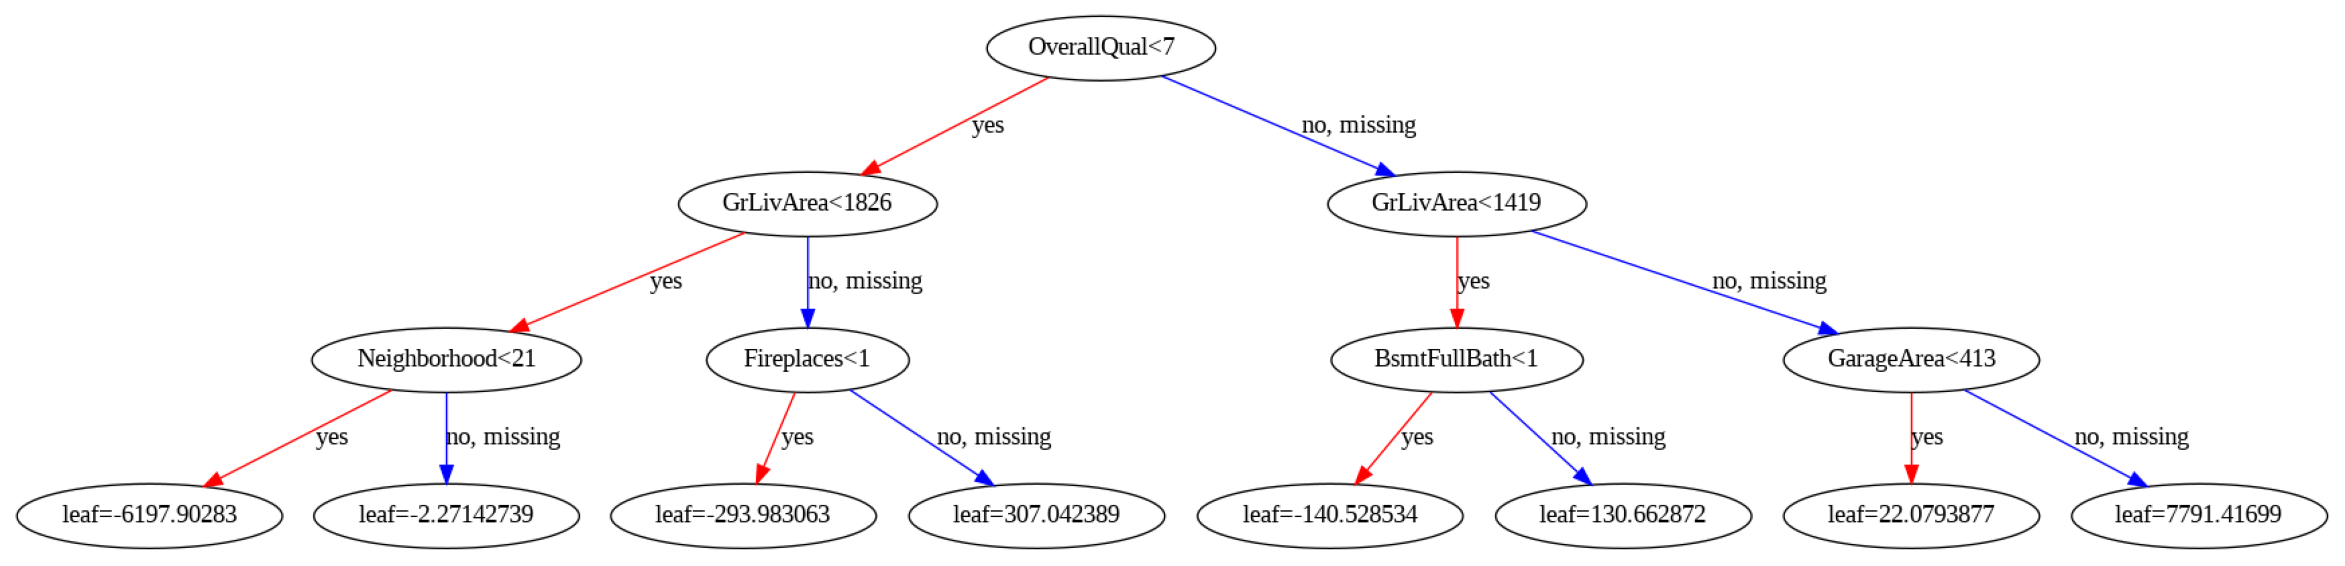

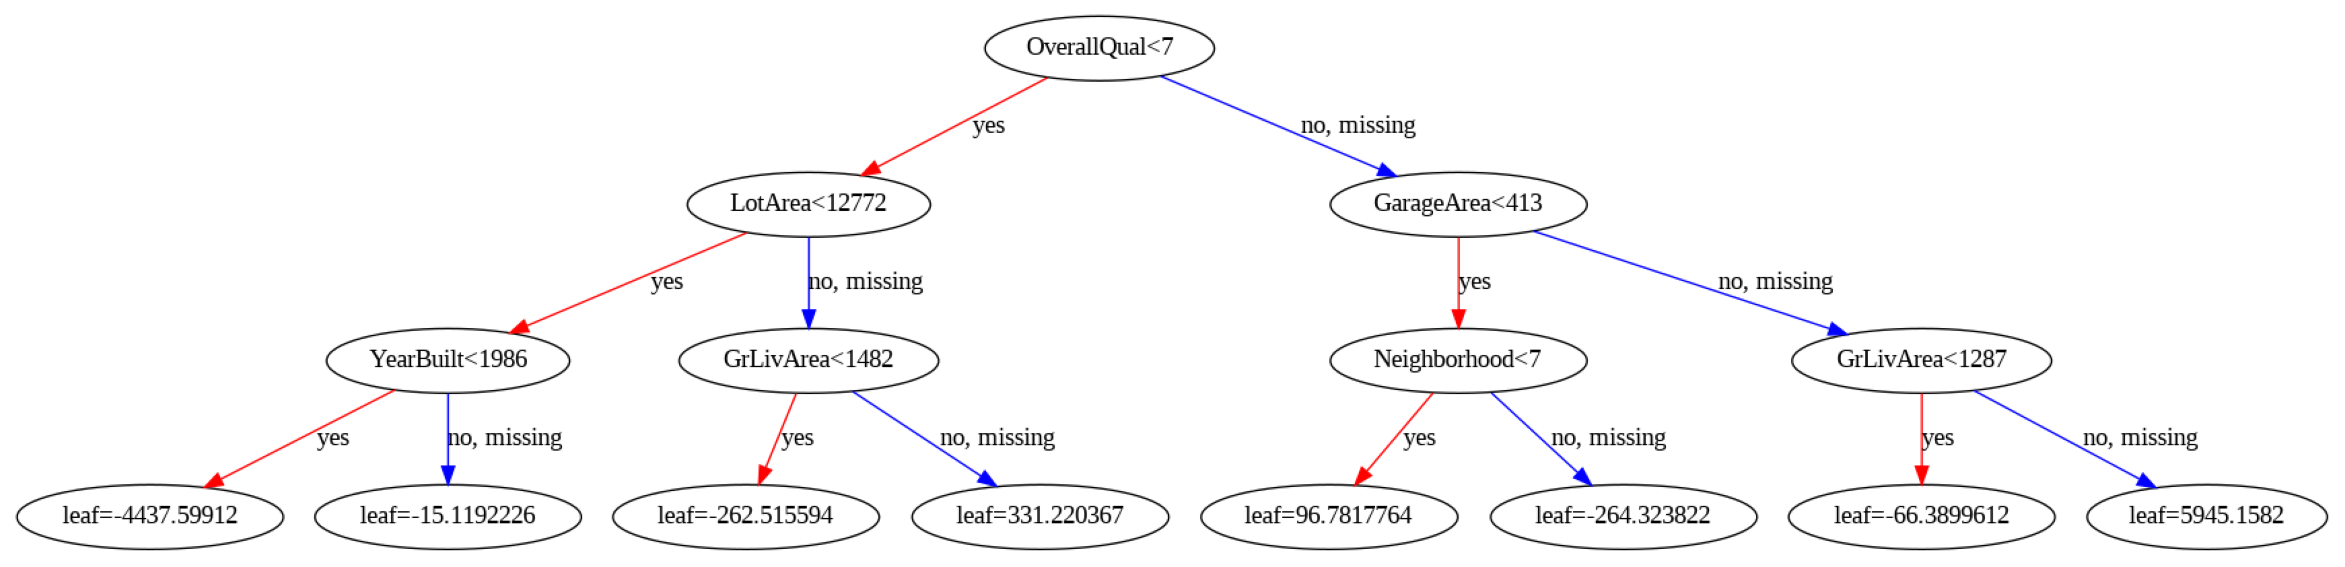

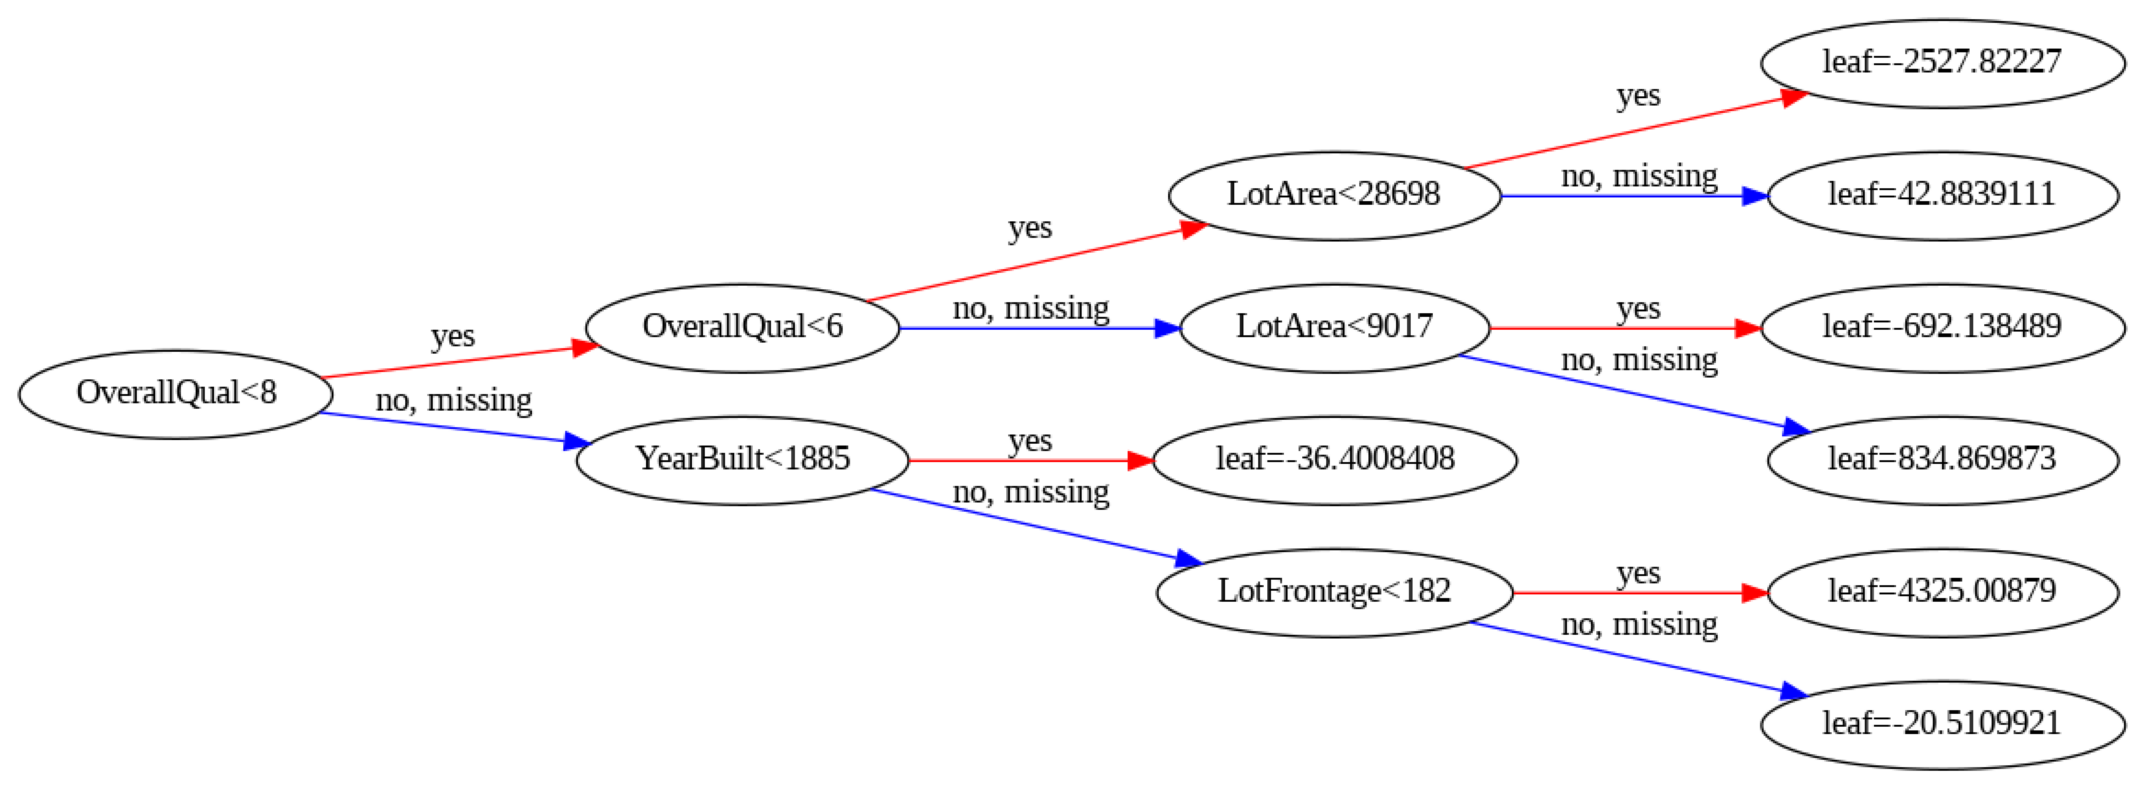

In [46]:
import matplotlib.pyplot as plt
import xgboost as xgb


# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

fig, ax = plt.subplots(figsize=(30, 10))

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(30, 10))

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=3, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(30, 10))

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir='LR', ax=ax)
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:19:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


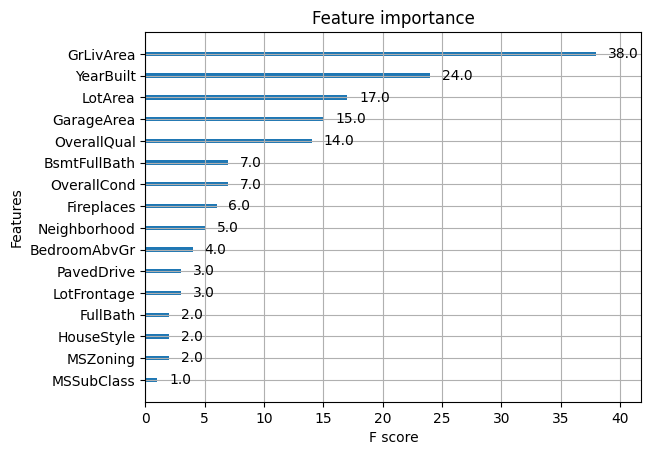

In [48]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

## Tuning our model


In [49]:
import pandas as pd
import xgboost as xgb
import numpy as np
housing_data = pd.read_csv("ames_housing_trimmed_processed.csv")
X,y = housing_data[housing_data.columns.tolist()[:-1]],housing_data[housing_data.columns.tolist()[-1]]
X.shape,y.shape

((1460, 56), (1460,))

In [50]:
## untuned data
housing_dmatrix = xgb.DMatrix(data=X,label=y)
untuned_params={"objective":"reg:linear"}
untuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix,
params=untuned_params,nfold=4,
metrics="rmse",as_pandas=True,seed=123)
print("Untuned rmse: %f" %((untuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

Untuned rmse: 33238.397179


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:24:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
<ipython-input-50-9ec360efdb98>:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Untuned rmse: %f" %((untuned_cv_results_rmse["test-rmse-mean"]).tail(1)))


In [51]:
# tuned data
tuned_params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5}
tuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix,params=tuned_params, nfold=4, num_boost_round=200, metrics="rmse",
as_pandas=True, seed=11201)
print("Tuned rmse: %f" %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:24:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Tuned rmse: 28597.912944


<ipython-input-51-7a4de4532235>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Tuned rmse: %f" %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))


Our rmse is much lower after a simple tuning of the parameters.

In [ ]:
#help(xgb)

###  Tuning the boosting rounds

In [52]:
## Tuning the boosting rounds(numbers of trees we build)
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))


   num_boosting_rounds          rmse
0                    5  40350.042785
1                   10  34222.544068
2                   15  32537.190260


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:27:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [53]:
## Automated boosting round selection using early_stopping

# Create housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:29:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0      61708.384075      789.992240    63420.791562    2613.472325
1      49522.546344      802.013790    53085.413747    2315.613545
2      41169.937732      688.760982    46216.723045    2275.292419
3      35291.530581      733.718357    41684.086762    2912.197343
4      31046.377888      516.077566    38496.489124    2817.930645
5      27696.206636      582.478240    36362.599330    2671.301364
6      25408.301944      330.625199    35302.558898    2856.045380
7      23639.812549      423.028610    34090.701206    2644.890618
8      22255.018210      457.633545    33549.535045    2224.370383
9      21042.204957      457.772868    33339.326024    2026.857986
10     20190.735243      444.843073    33050.944991    1820.593939
11     19405.436763      422.811600    32872.225752    1607.504842
12     18825.729259      345.778797    32827.872247    1598.434460
13     18276.857540      286.175363    32595.274062    1458.33

### Some tunable parametres in XGBOOst
It depends on base learner of the model.
**Tree Base Learner:**
- **Learning Rate (eta):** Affects how quickly the model fits the residual error using additional base learners.
- **Gamma (min_split_loss):** Minimum loss reduction required to make a further partition on a leaf node of the tree.
- **Alpha (L1 regularization):** L1 regularization term on leaf weights. Encourages sparsity of the solution.
- **Lambda (L2 regularization):** L2 regularization term on leaf weights.
- **Max Depth (max_depth):** Maximum depth of a tree. Controls the maximum number of nodes allowed from the root to the farthest leaf. Tree depth.
- **Subsample (subsample):** Fraction(0-1) of the total training set that can be used for any given boosting round.
- **Colsample Bytree (colsample_bytree):** Fraction(0-1) of features you can select from during any given boosting round.

**Linear Base Learner:**
- **L1 Regularization (alpha):** L1 regularization term applied to the weights associated with any given feature. Encourages sparsity of the solution.
- **L2 Regularization (lambda):** L2 regularization term applied to the weights associated with any given feature.
- **Bias Regularization (lambda_bias):** Regularization term applied to the model's bias.
- **Number of Boosting Rounds (num_boost_round):** The number of boosting rounds, equivalent to the number of trees for tree base learners or the number of linear base learners.


In [54]:
## tuning eta(learning rate)
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta
for curr_val in eta_vals:

    params["eta"] = curr_val

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3,
                        num_boost_round=10, early_stopping_rounds=5,
                        metrics="rmse", as_pandas=True, seed=123)

    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

     eta     best_rmse
0  0.001  78903.745397
1  0.010  74293.709019
2  0.100  47136.241898


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:29:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [55]:
## Tuning max_depth
# Create  housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:linear"}

# Create list of max_depth values
max_depths = [2, 5, 10, 20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val

    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)

    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:29:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:29:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


   max_depth     best_rmse
0          2  37140.345524
1          5  34301.329122
2         10  35733.363167
3         20  35937.767774


**Tuning colsample_bytree**
Now, it's time to tune "colsample_bytree". You've already seen this if you've ever worked with scikit-learn's RandomForestClassifier or RandomForestRegressor, where it just was called max_features. In both xgboost and sklearn, this parameter (although named differently) simply specifies the fraction of features to choose from at every split in a given tree.

In [56]:
## Tuning colsample_bytree

# Create housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:linear","max_depth":3}

# Create list of hyperparameter values
colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

# Systematically vary the hyperparameter value
for curr_val in colsample_bytree_vals:

    params["colsample_bytree"] = curr_val

    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)

    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree     best_rmse
0               0.1  47958.123027
1               0.5  35066.230191
2               0.8  35199.444917
3               1.0  34786.230629


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:29:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


## ultimate tuning: grid search and random search
1. **Review of Grid Search and Random Search:**
   - Grid Search and Random Search are strategies for finding optimal hyperparameters simultaneously, especially when they interact in non-obvious, non-linear ways.
   - Grid Search exhaustively searches through a collection of possible parameter values.
   - Random Search randomly selects combinations of hyperparameter values a specified number of times.

2. **Grid Search:**
   - Grid Search tries all possible parameter configurations and evaluates a metric for each configuration.
   - It selects the parameter configuration that gives the best value for the chosen metric.
   - Involves trying every parameter configuration in a grid.

3. **Random Search:**
   - Random Search randomly selects combinations of hyperparameter values from the range of allowable values.
   - It allows you to decide the number of models or iterations to try before stopping.
   - Each iteration involves training a model, evaluating its performance, and repeating the process.
   - After the specified number of iterations, it selects the best-performing model.

In [57]:
## Grid Search
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5] # total para 2*2*1=4
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error', cv=4, verbose=1) #cv=num of cross validation fold
grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 2, 'n_estimators': 50}
Lowest RMSE found:  30948.247344949472


In [58]:
## RandomSearch
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'n_estimators': [10,20,30,40],
    'max_depth': range(2, 12)   ## para 4*10
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid,
                                    n_iter=5, scoring='neg_mean_squared_error', cv=4, verbose=1)
randomized_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ",randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters found:  {'n_estimators': 40, 'max_depth': 8}
Lowest RMSE found:  32057.705121548388


The search space size can be massive for Grid Search in certain cases, whereas for Random Search the number of hyperparameters has a significant effect on how long it takes to run.